### **Clustering with Iris Dataset :**

### **Introdution :**

Clustering is a key technique in unsupervised machine learning, used to identify natural groupings within data.

This project explores the Iris dataset, a classic dataset in data science that includes measurements of sepal and petal dimensions for three species of flowers.

### **Objectives :**

The primary goal of this project is to use clustering techniques to uncover patterns and groupings within the Iris dataset. By evaluating and comparing the performance of different clustering models.
The project also demonstrates essential data preparation steps, including cleaning, visualization, and handling outliers, which are critical for effective analysis.


# **Data Overview:**

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
# importing data set
Iris = pd.read_csv('Iris.csv')
iris = Iris.copy()
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#proper naming for data set

iris.columns = iris.columns.str.lower().str.replace(' ', '_')

# drop id column because it's not a feature

iris.drop('id',axis=1,inplace=True)
iris.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepallengthcm  150 non-null    float64
 1   sepalwidthcm   150 non-null    float64
 2   petallengthcm  150 non-null    float64
 3   petalwidthcm   150 non-null    float64
 4   species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


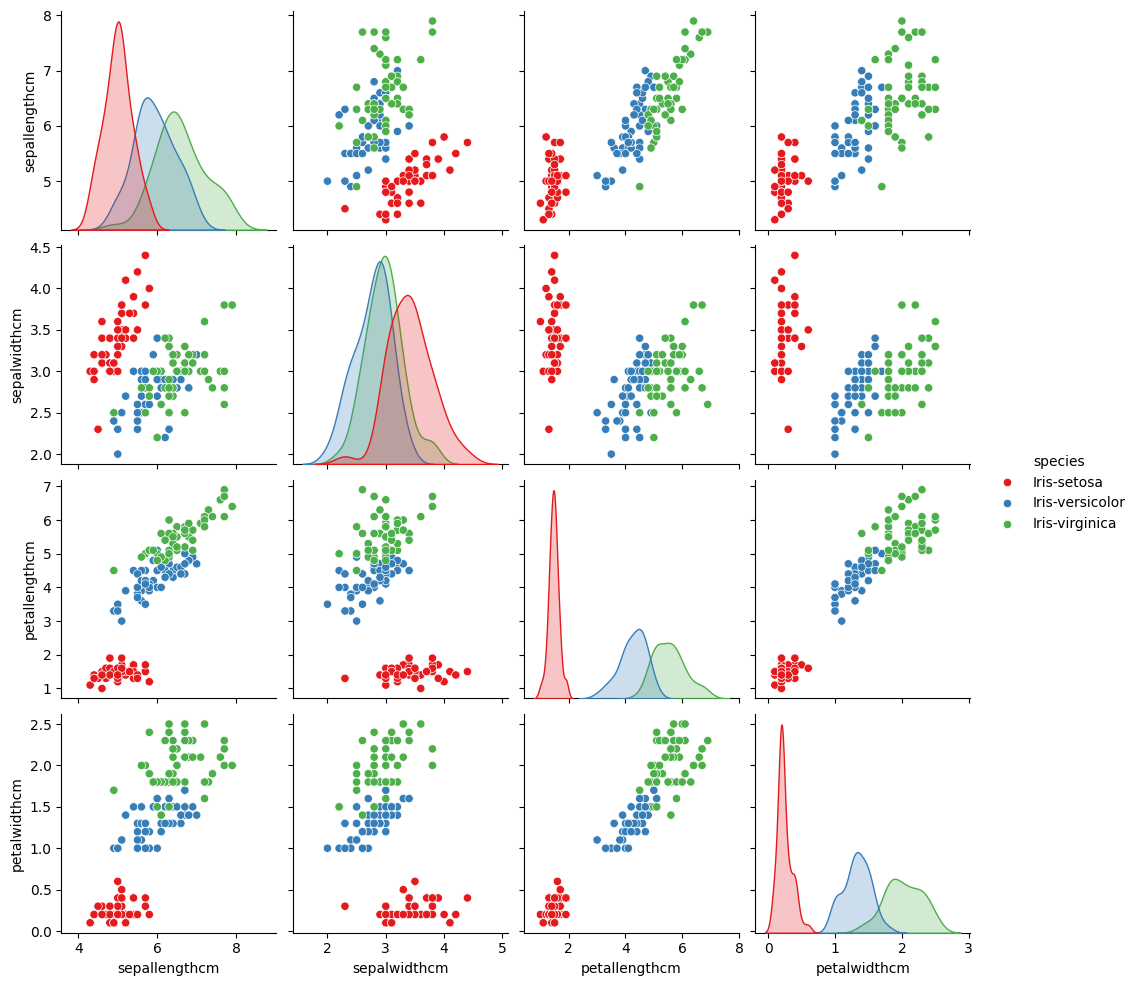

In [ ]:
#plot data set

sns.pairplot(data=iris ,hue="species",palette="Set1")
plt.show()


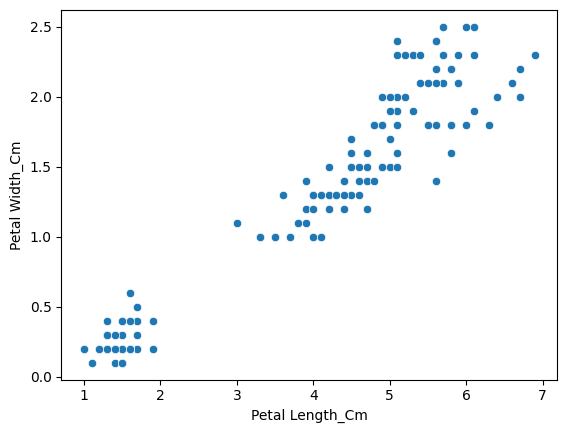

In [ ]:
#scater the petal

sns.scatterplot(x='petallengthcm', y='petalwidthcm', data=iris)
plt.xlabel('Petal Length_Cm')
plt.ylabel('Petal Width_Cm')
plt.show()

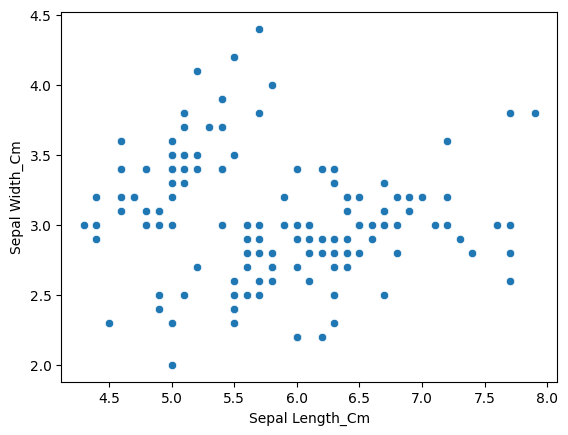

In [ ]:
# scatter the sepal

sns.scatterplot(x='sepallengthcm', y='sepalwidthcm', data=iris)
plt.xlabel('Sepal Length_Cm')
plt.ylabel('Sepal Width_Cm')
plt.show()

In [ ]:
# checking missing values
iris.isnull().sum()

,0
sepallengthcm,0
sepalwidthcm,0
petallengthcm,0
petalwidthcm,0
species,0


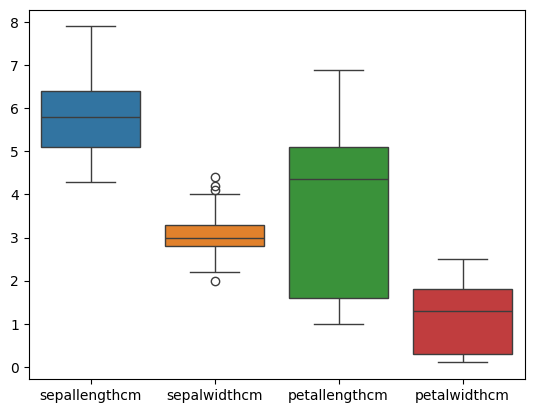

In [ ]:
#detecting outliers

sns.boxplot(data=iris)
plt.show()

**2-Detecting outliers using IQR**
$$ IQR = Q3 - Q1 $$

$$ \text{Outliers} < Q1 - 1.5 * IQR \text{  or  } \text{Outliers} > Q3 + 1.5 * IQR $$

In [ ]:
# calculating interquartile range for outliers

Q1 = iris['sepalwidthcm'].quantile(0.25)
Q3 = iris['sepalwidthcm'].quantile(0.75)
IQR = Q3 - Q1

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

print(f'Outliers below: {Q1 - 1.5 * IQR:.3f}')
print(f'Outliers above: {Q3 + 1.5 * IQR:.3f}')

Q1:  2.8
Q3:  3.3
IQR:  0.5
Outliers below: 2.050
Outliers above: 4.050


In [ ]:
# Create the boolean mask for outliers
iqr_outliers_mask = (iris['sepalwidthcm'] < (Q1 - 1.5 * IQR)) | (iris['sepalwidthcm'] > (Q3 + 1.5 * IQR))

# Filter the DataFrame to get the outlier rows
iqr_outliers = iris[iqr_outliers_mask]

# Print the percentage of outliers
print(f'Percentage of Outliers: {len(iqr_outliers)/len(iris)*100:.3f} %')

# Display the outlier DataFrame
iqr_outliers

Percentage of Outliers: 2.667 %


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


Only four records are outliers which is blew the minimum threshold. We will deal with them later when it comes to clustering by all features

# **1- Using kmeans:**

### **- Clustering for Petal's features :**

In [ ]:
#create data frame contain only the required features(Petal Length_Cm and Petal Width_Cm)

petal_df = iris[['petallengthcm','petalwidthcm']]
petal_df.head()

,petallengthcm,petalwidthcm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


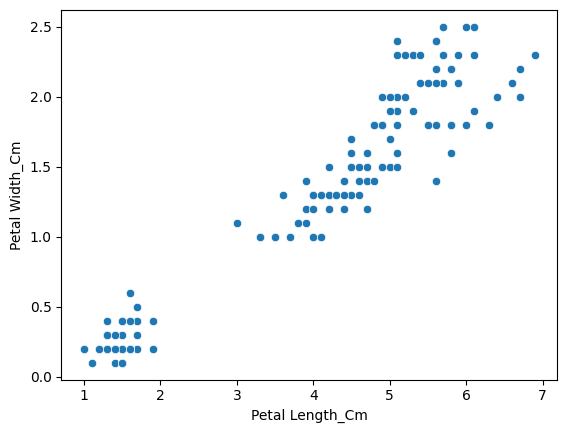

In [ ]:
# scatter plot
sns.scatterplot(x='petallengthcm', y='petalwidthcm', data=petal_df)
plt.xlabel('Petal Length_Cm')
plt.ylabel('Petal Width_Cm')
plt.show()

In [ ]:
#apply feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_petal = scaler.fit_transform(petal_df)
scaled_petal

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

In [ ]:
# choosing best k for model:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
score = []
for k in range(2, 16):
    model_petal = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42) #(init='k-means++', n_init=10, random_state=42) for optimal inertia
    model_petal.fit(scaled_petal)
    ssd.append(model_petal.inertia_)

    # calculate the silhoutte score againest the number of clusters

    score.append(silhouette_score(scaled_petal, model_petal.labels_))

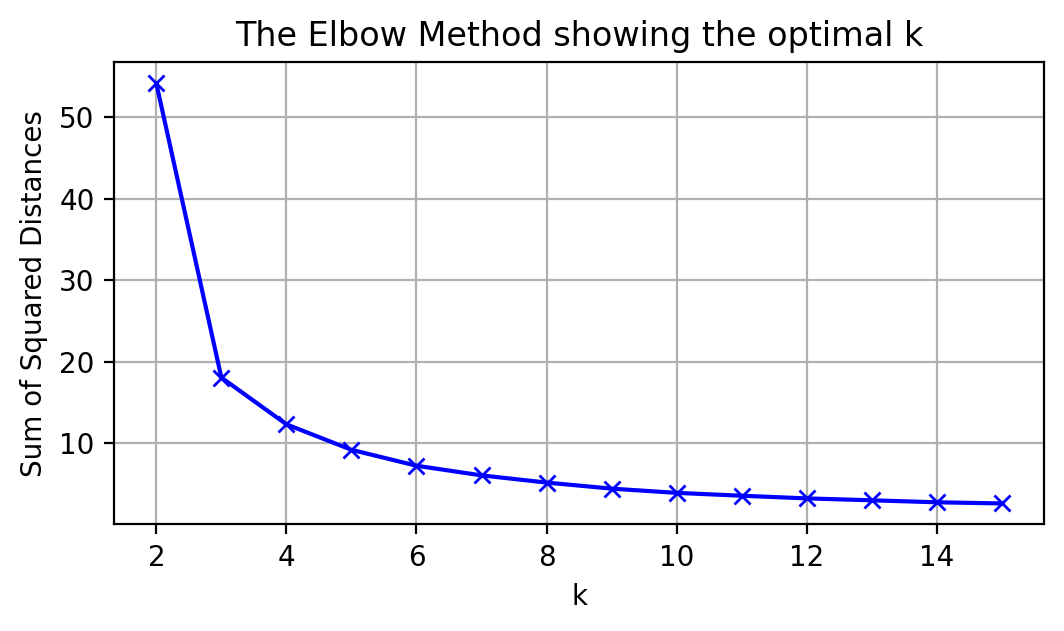

In [ ]:
# Elbow plot

plt.figure(figsize=(6, 3), dpi=200)
plt.plot(range(2, 16), ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Change in Sum of Squared Distances')

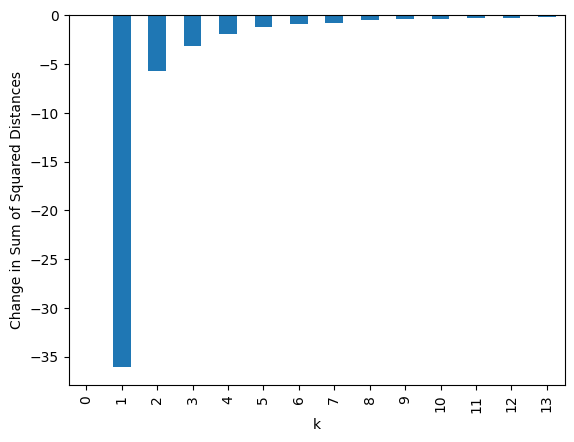

In [ ]:
#bar plot showing the SSD difference from the previous cluster.

pd.Series(ssd).diff()
pd.Series(ssd).diff().plot(kind='bar')
plt.xlabel('k')
plt.ylabel('Change in Sum of Squared Distances')

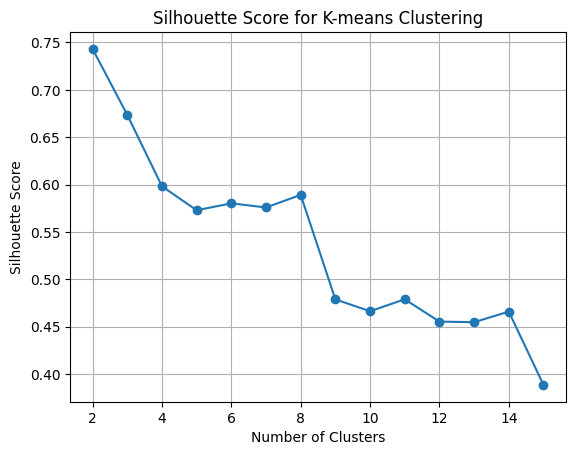

In [ ]:
# plot the silhoutte score agianest the number of clusters
plt.plot(range(2, 16), score, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-means Clustering")
plt.grid(True)
plt.show()

the best scenario when k = 3

In [ ]:
#k = 3
kmeans_petal3 = KMeans(n_clusters = 3, n_init=10, random_state=42)
y_kmeans_petal3 = kmeans_petal3.fit_predict(scaled_petal)

In [ ]:
# calculate silhouette_score

from sklearn.metrics import silhouette_score

silhouette_score(scaled_petal,y_kmeans_petal3)

0.6736179401065728

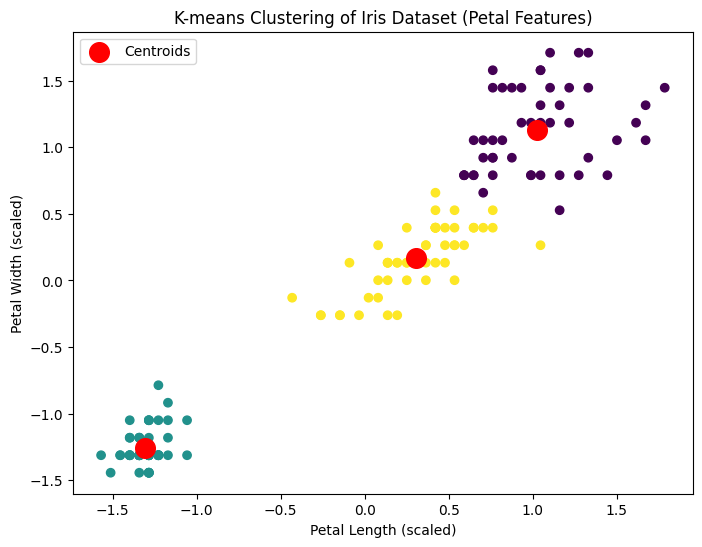

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_petal[:,0], scaled_petal[:,1], c=y_kmeans_petal3, cmap='viridis')

# Access cluster centers from the kmeans_petal3 object
plt.scatter(kmeans_petal3.cluster_centers_[:, 0], kmeans_petal3.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('K-means Clustering of Iris Dataset (Petal Features)')
plt.legend()
plt.show()

**The results:**

**The optimal model for k-means clustering when K = 3 clusters, which
 approximately has the same data point frequency and a silhoutte score of 0.67**

****

---




### **- Clustering for all features :**

In [ ]:
iris.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#create a copy
iris_km = iris.copy()

# drop species feature

iris_km.drop('species', axis=1, inplace= True )
iris_km.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now before modeling we need to deel with outliers in sepal width that we observed ealier which are four records.

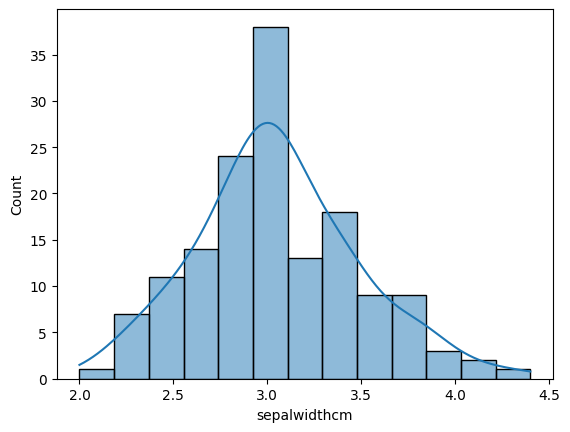

In [ ]:
#plot histogram for sepal width
sns.histplot(data=iris_km, x='sepalwidthcm', kde=True)
plt.show()

In [ ]:
# hadeling outliers using the mean of the feature (sepal width) because there a few records
sepal_width_mean = iris_km['sepalwidthcm'].mean()

sepal_width_mean

3.0540000000000003

In [ ]:
# Replace outliers in 'sepalwidthcm' with the mean
iris_km.loc[iqr_outliers_mask, 'sepalwidthcm'] = sepal_width_mean



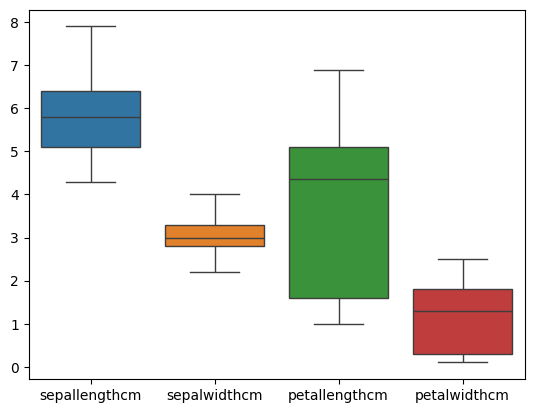

In [ ]:
# check again for outliers in the new dataset
sns.boxplot(data=iris_km)
plt.show()

In [ ]:
#apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iriskm_scaled = scaler.fit_transform(iris_km)
iriskm_scaled

array([[-9.00681170e-01,  1.19058952e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -9.63673290e-02, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  4.18415411e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.61024041e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.44798089e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  2.22015500e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  9.33198151e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  9.33198151e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.53758699e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.61024041e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.70537226e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  9.33198151e-01, -1.22754100e+00,
      

**Choosing the optimal K**

In [ ]:
# choosing best k for the model:

from sklearn.cluster import KMeans

ssd = []
score_kmean = []

for k in range(2, 16):

    km_model= KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42)
    km_model.fit(iriskm_scaled)
    ssd.append(km_model.inertia_)

    # calculate the silhoutte score agianest the number of clusters

    score_kmean.append(silhouette_score(iriskm_scaled, km_model.labels_))



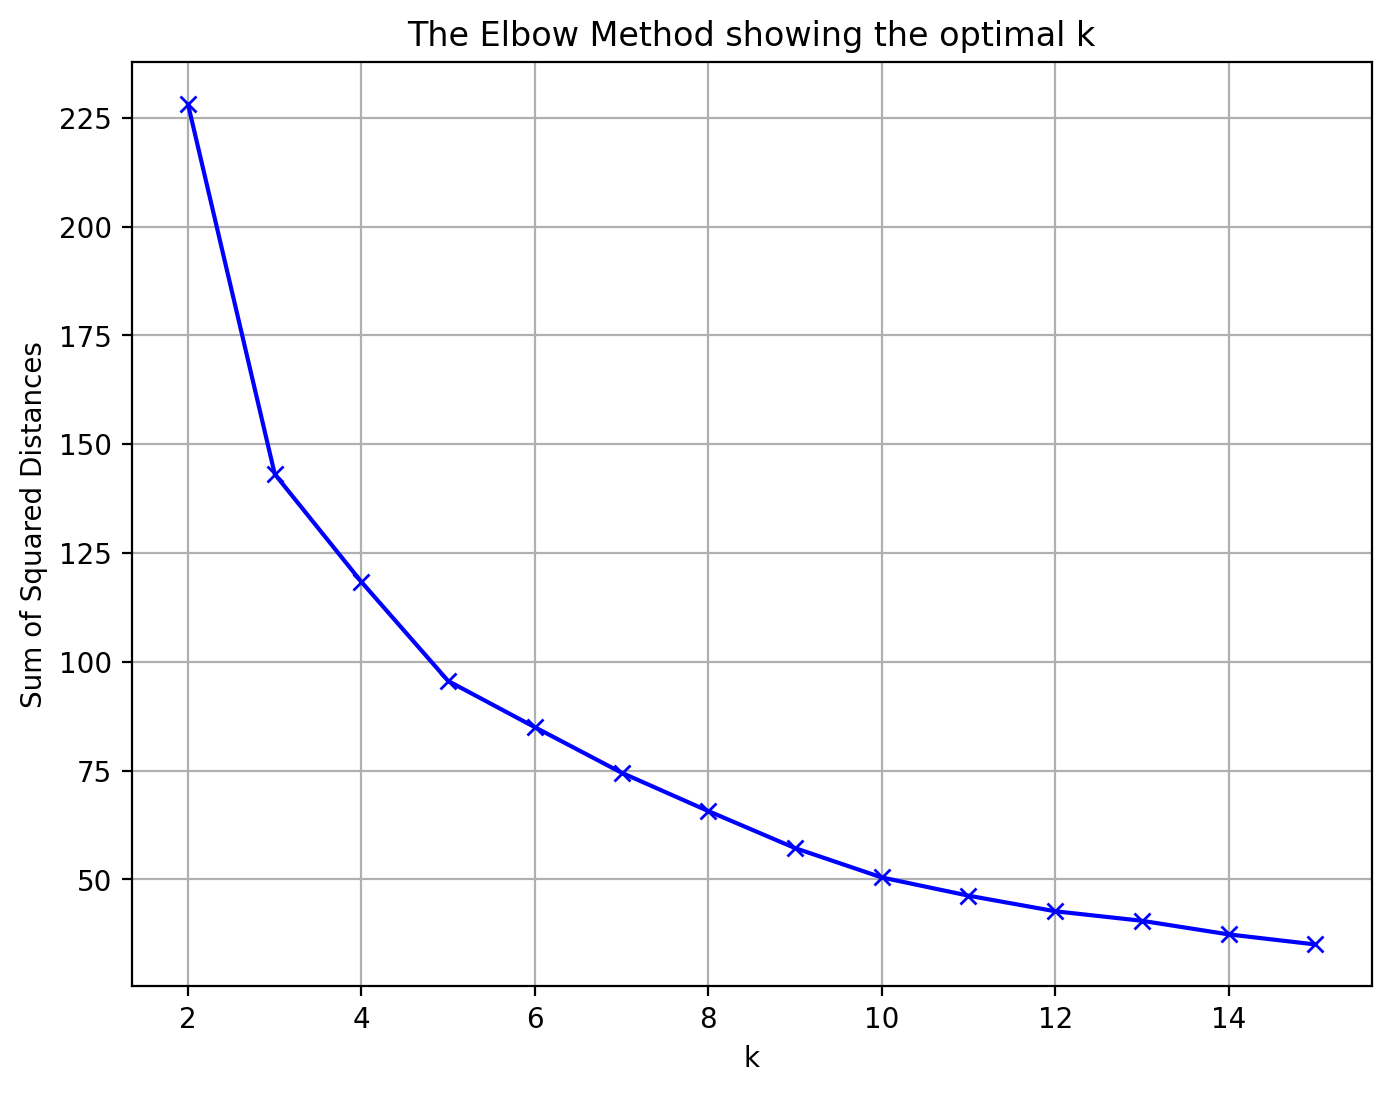

In [ ]:
# Elbow plot

plt.figure(figsize=(8, 6), dpi=200)
plt.plot(range(2, 16), ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Change in Sum of Squared Distances')

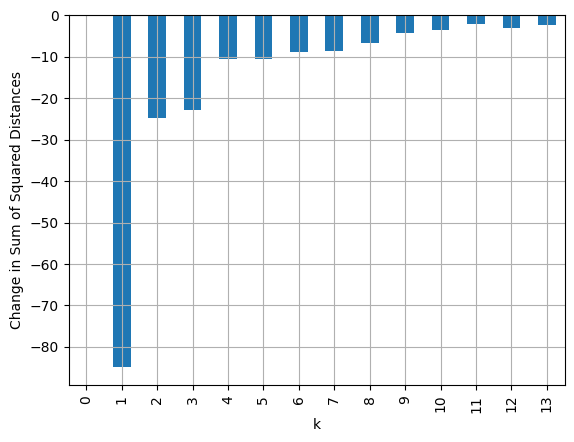

In [ ]:
#bar plot showing the SSD difference from the previous cluster.

pd.Series(ssd).diff()
pd.Series(ssd).diff().plot(kind='bar')
plt.xlabel('k')
plt.grid(True)
plt.ylabel('Change in Sum of Squared Distances')

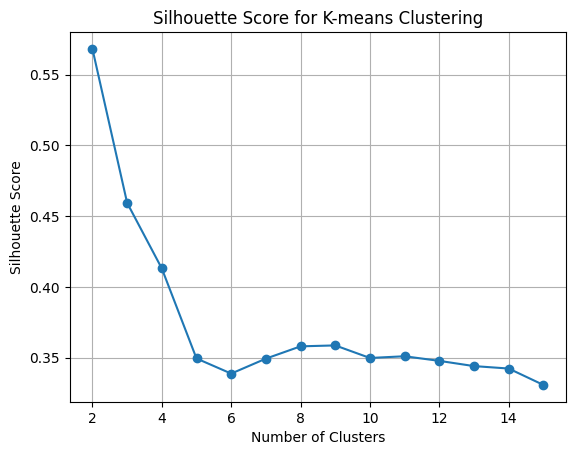

In [ ]:
# plot the silhoutte score against the number of clusters
plt.plot(range(2, 16), score_kmean, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-means Clustering")
plt.grid(True)
plt.show()

In [ ]:
# k=3
kmeans_iris3 = KMeans(n_clusters = 3, n_init=10, random_state=42)
y_kmeans_iris3 = kmeans_iris3.fit_predict(iriskm_scaled)

# calculate silhoutte score
silhouette_score(iriskm_scaled,y_kmeans_iris3)

0.45936934715560257

cluster
0    45
1    50
2    55
Name: cluster, dtype: int64


<Axes: xlabel='cluster'>

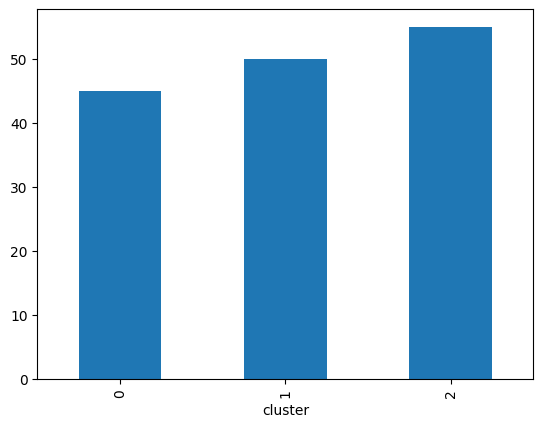

In [ ]:
# append clusters and visulize its frequency
iris_km['cluster'] = y_kmeans_iris3

#bar plot for clusters
cluster_counts = iris_km.groupby('cluster')['cluster'].count()
print(cluster_counts)

# You can also visualize the cluster counts with a bar plot
cluster_counts.plot(kind='bar')

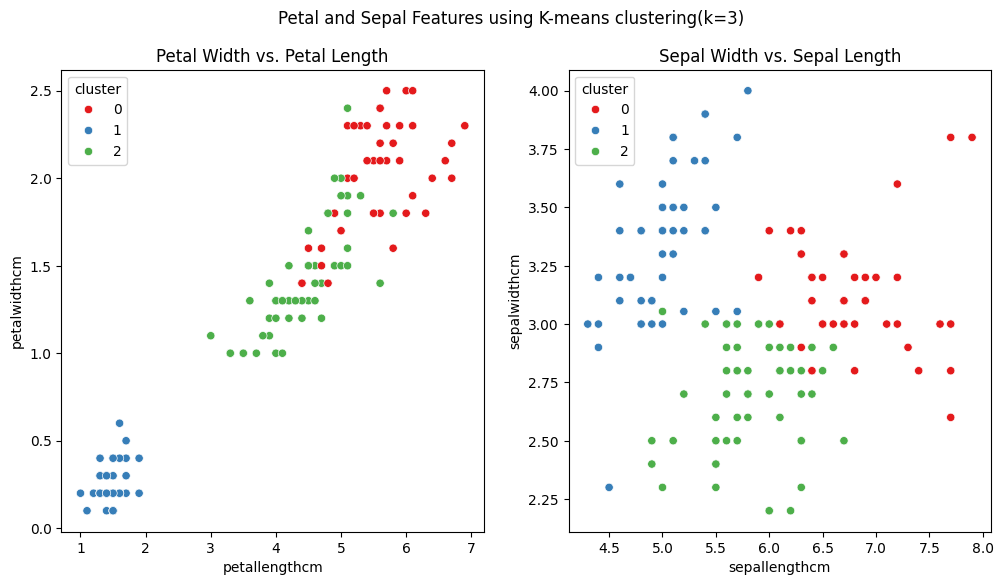

In [ ]:
# Create a figure and two subplots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Petal and Sepal Features using K-means clustering(k=3)')

# Scatter plot 1: Petal width vs. Petal length, colored by cluster
sns.scatterplot(x='petallengthcm', y='petalwidthcm', hue='cluster', data=iris_km, palette="Set1", ax=ax1)
ax1.set_title('Petal Width vs. Petal Length')

# Scatter plot 2: Sepal width vs. Sepal length, colored by cluster
sns.scatterplot(x='sepallengthcm', y='sepalwidthcm', hue='cluster', data=iris_km, palette="Set1", ax=ax2)
ax2.set_title('Sepal Width vs. Sepal Length')

plt.show()

In [ ]:
#k = 4
kmeans_iris4 = KMeans(n_clusters = 4, init='k-means++',n_init=10, random_state=42)
y_kmeans_iris4 = kmeans_iris4.fit_predict(iriskm_scaled)

# calculate silhoutte score
silhouette_score(iriskm_scaled,y_kmeans_iris4)


0.41301588259033933

cluster
0    49
1    50
2    22
3    29
Name: cluster, dtype: int64


<Axes: xlabel='cluster'>

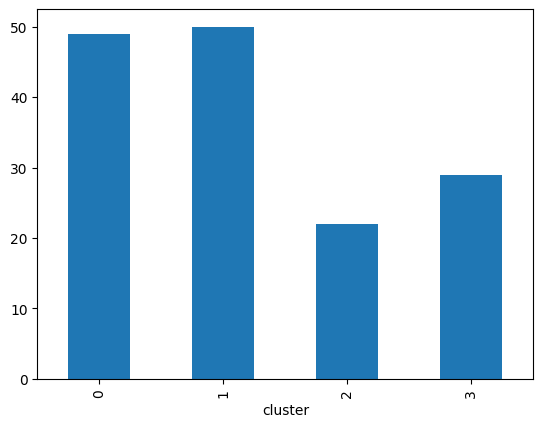

In [ ]:
# append cluster
iris_4k = iris_km.copy()
iris_4k['cluster'] = y_kmeans_iris4

#count clusters and plot bar chart
cluster_counts = iris_4k.groupby('cluster')['cluster'].count()
print(cluster_counts)

# You can also visualize the cluster counts with a bar plot
cluster_counts.plot(kind='bar')

**The (kmeans_iris3) model with 3 clusters is preferred over (kmeans_iris4) model with 4 clusters because:**

1- It achieves a higher silhouette score, indicating more distinct and well-defined clusters.

2- Its cluster frequency distribution also aligns better with the underlying structure of the data. Additionally,

3- The elbow method provides further support for 3 clusters as the optimal number.

# **2- Using Agglomerative Clustering :**

In [ ]:
iris.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#make copy of the data
iris_agg = iris.copy()
iris_agg.drop('species', axis=1, inplace= True )
iris_agg.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

agg_iris_scaled = scaler.fit_transform(iris_agg)
agg_iris_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

score_agg = []

for k in range(2, 16):

    hierarchical_model = AgglomerativeClustering(n_clusters=k)

    cluster_labels = hierarchical_model.fit_predict(agg_iris_scaled)

    # calculate the silhouette_score
    score_agg.append(silhouette_score(agg_iris_scaled, cluster_labels))


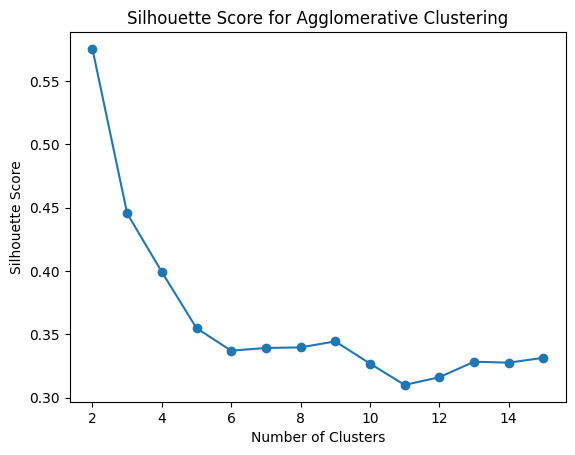

In [ ]:
# plot silhoutte score

plt.plot(range(2, 16), score_agg, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Agglomerative Clustering")
plt.show()

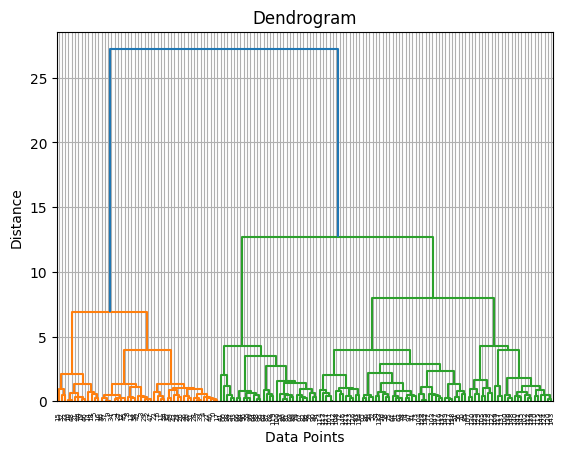

In [ ]:
#plot the dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(agg_iris_scaled, method='ward')
dendrogram(linkage_data)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [ ]:
# Agglomerative clustering when k =2

hierarchical_model_2 = AgglomerativeClustering(n_clusters=2)

cluster_labels = hierarchical_model_2.fit_predict(agg_iris_scaled)

#calculate the silhoutte score

silhouette_score(agg_iris_scaled, cluster_labels)


0.5753869579723335

In [ ]:
# append the clusterlabels
iris_aggo = iris.copy()
iris_aggo['cluster'] = cluster_labels


cluster
0    101
1     49
Name: cluster, dtype: int64


<Axes: xlabel='cluster'>

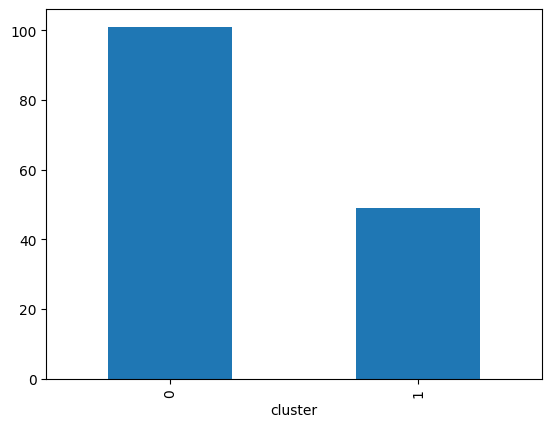

In [ ]:
#count the frequecy of the clusters
cluster_counts = iris_aggo.groupby('cluster')['cluster'].count()
print(cluster_counts)

# You can also visualize the cluster counts with a bar plot
cluster_counts.plot(kind='bar')


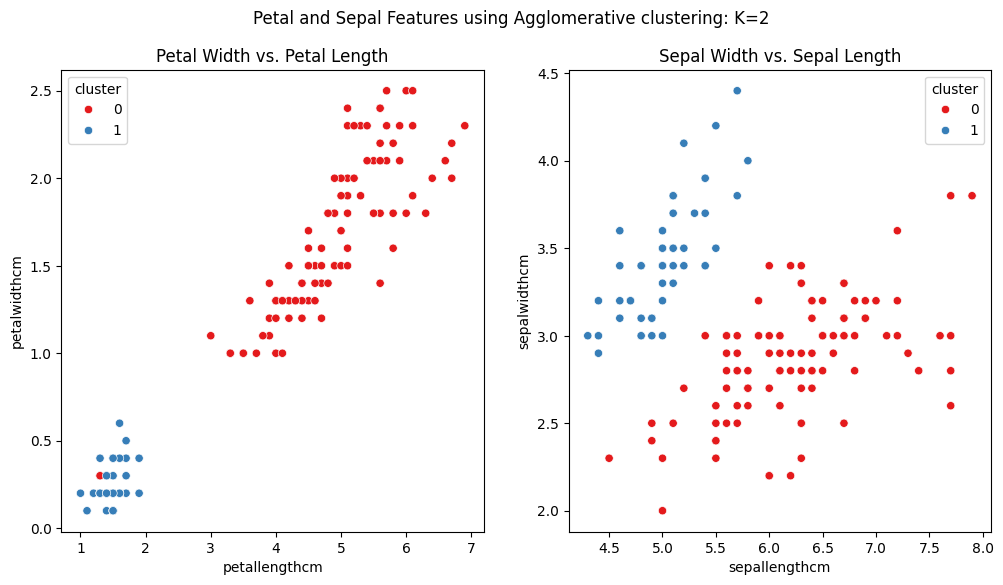

In [ ]:
# create a subplot for petal and sepal features

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Petal and Sepal Features using Agglomerative clustering: K=2')

# Scatter plot 1: Petal width vs. Petal length, colored by cluster
sns.scatterplot(x='petallengthcm', y='petalwidthcm', hue='cluster', data=iris_aggo, palette="Set1", ax=ax1)
ax1.set_title('Petal Width vs. Petal Length')

# Scatter plot 2: Sepal width vs. Sepal length, colored by cluster
sns.scatterplot(x='sepallengthcm', y='sepalwidthcm', hue='cluster', data=iris_aggo, palette="Set1", ax=ax2)
ax2.set_title('Sepal Width vs. Sepal Length')

plt.show()


In [ ]:
# Agglomerative clustering when k =3

hierarchical_model_3 = AgglomerativeClustering(n_clusters=3)
cluster_labels_m3 = hierarchical_model_3.fit_predict(agg_iris_scaled)
silhouette_score(agg_iris_scaled, cluster_labels_m3)


0.44553956399200406

In [ ]:
# append the cluster labels
iris_aggo3 = iris.copy()
iris_aggo3['cluster'] = cluster_labels_m3


cluster
0    71
1    49
2    30
Name: cluster, dtype: int64


<Axes: xlabel='cluster'>

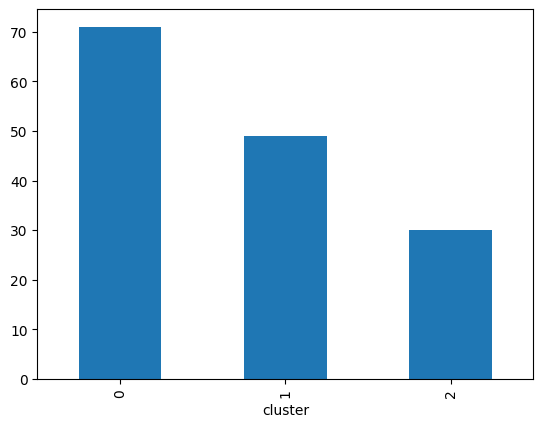

In [ ]:
#count the frequecy of the clusters
cluster_counts = iris_aggo3.groupby('cluster')['cluster'].count()
print(cluster_counts)

# You can also visualize the cluster counts with a bar plot
cluster_counts.plot(kind='bar')

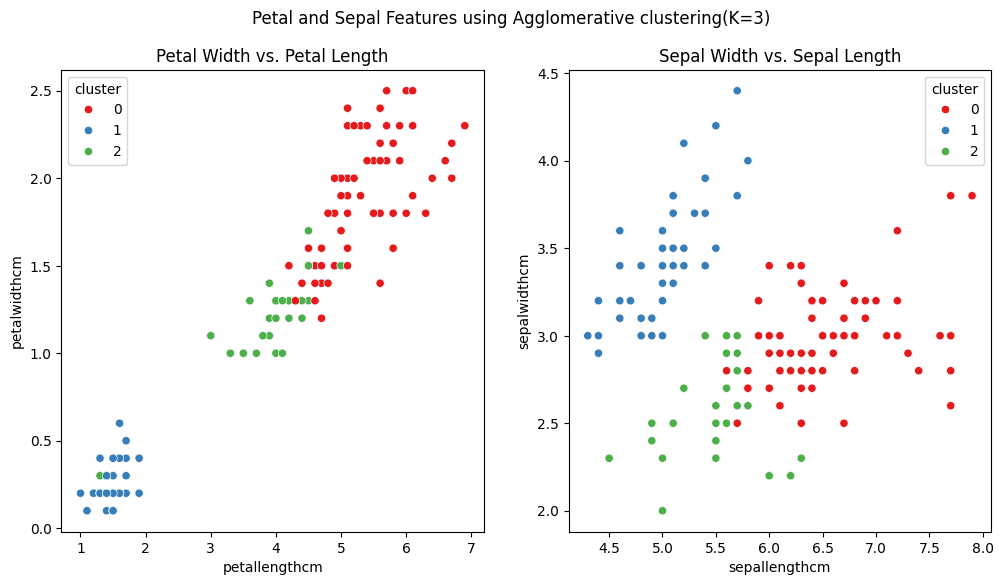

In [ ]:
# create a subplot for petal and sepal features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Petal and Sepal Features using Agglomerative clustering(K=3)')

# Scatter plot 1: Petal width vs. Petal length, colored by cluster
sns.scatterplot(x='petallengthcm', y='petalwidthcm', hue='cluster', data=iris_aggo3, palette="Set1", ax=ax1)
ax1.set_title('Petal Width vs. Petal Length')

# Scatter plot 2: Sepal width vs. Sepal length, colored by cluster
sns.scatterplot(x='sepallengthcm', y='sepalwidthcm', hue='cluster', data=iris_aggo3, palette="Set1", ax=ax2)
ax2.set_title('Sepal Width vs. Sepal Length')

plt.show()

**Conclusion:**
The Agglomerative Clustering model with ( k = 3 ) is preferred due to its balanced cluster distribution, which better reflects the dataset’s natural structure, despite a slightly lower silhouette score than ( k = 2 ). While the dendrogram supports both options, the more balanced clustering at ( k = 3 ) makes it the optimal choice.

# **3- Using DBSCAN :**

In [ ]:
# create a copy of the original data set
iris_db = iris.copy()

#drop species feature
iris_db.drop('species', axis=1, inplace= True )
iris_db.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#apply feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

db_iris_scaled = scaler.fit_transform(iris_db)
db_iris_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [ ]:
# DBSCAN modeling

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# choose the best epsilon
outlier_percentage = []

for eps in np.linspace(0.001,3,50):

    dbscan_model = DBSCAN(eps=eps) #defalut min_samples
    db_labels =  dbscan_model.fit_predict(db_iris_scaled)


    #outlier percentage
    perc_outliers = 100 * np.sum(dbscan_model.labels_ == -1) / len(db_labels)

    outlier_percentage.append(perc_outliers)


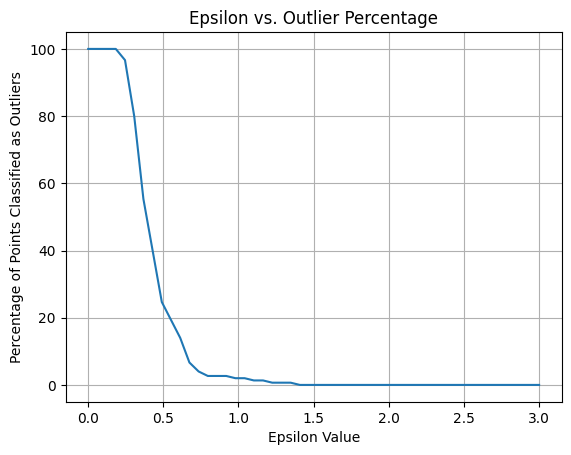

In [ ]:
# Visualize the relationship between epsilon and the percentage of outliers detected by DBSCAN.
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percentage )
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.title("Epsilon vs. Outlier Percentage")
plt.grid(True)
plt.show()

In [ ]:
# The epsilon value of 0.6 was selected based on the graph between epsilon and outlier percentage.
dbscan_model = DBSCAN(eps=0.6)
db_labels =  dbscan_model.fit_predict(db_iris_scaled)

#calculate the silhoutte score
silhouette_score(db_iris_scaled, db_labels)


0.4023782804923914

cluster
-1    26
 0    46
 1    78
Name: cluster, dtype: int64


<Axes: xlabel='cluster'>

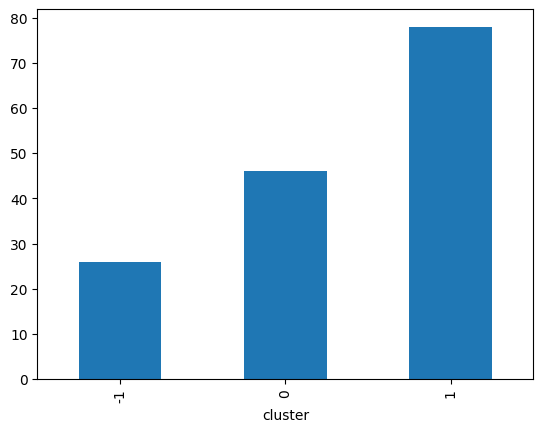

In [ ]:
# append the cluster labels
iris_db['cluster'] = db_labels

#count the frequecy of the clusters
cluster_counts = iris_db.groupby('cluster')['cluster'].count()
print(cluster_counts)

# create a bar chat
cluster_counts.plot(kind='bar')


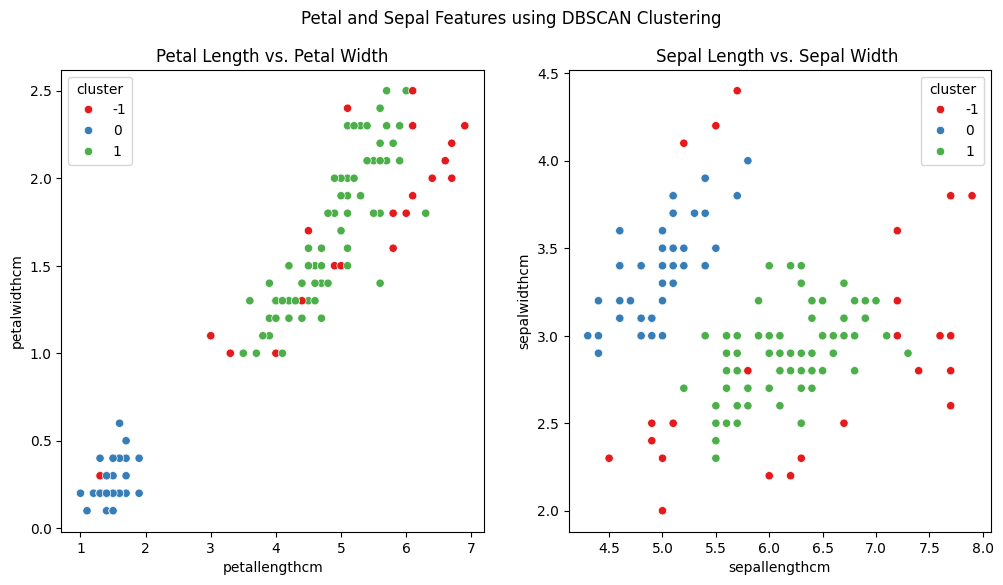

In [ ]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Petal and Sepal Features using DBSCAN Clustering')

# Scatter plot 1: Petal length vs. Petal width, colored by cluster
sns.scatterplot(x='petallengthcm', y='petalwidthcm', hue='cluster', data=iris_db, palette="Set1", ax=ax1)
ax1.set_title('Petal Length vs. Petal Width')

# Scatter plot 2: Sepal width vs. Sepal length, colored by cluster
sns.scatterplot(x='sepallengthcm', y='sepalwidthcm', hue='cluster', data=iris_db, palette="Set1", ax=ax2)
ax2.set_title('Sepal Length vs. Sepal Width ')

plt.show()

# **Model Evaluation Summary:**
Three clustering methods were applied to the Iris dataset: **KMeans**, **Agglomerative Clustering**, and **DBSCAN**.
Here’s a summary of their performance:

- **KMeans**:
  - Optimal number of clusters: **k=3** (determined using the elbow method).
  - **Silhouette score**: 0.45, indicating well-defined clusters.
  - Balanced cluster sizes with clear visual separation.

- **Agglomerative Clustering**:
  - Best performance with **k=2**, but clusters were imbalanced.
  - With **k=3**, the clusters were more balanced, but the silhouette score was slightly lower.
  - Dendrogram analysis supports both **k=2** and **k=3** as viable options.

- **DBSCAN**:
  - Optimal **epsilon**: 0.6, chosen to minimize outliers.
  - **Silhouette score**: 0.40
  - the model has imbalanced clusters sizes, with one cluster dominating.

### Conclusion
**KMeans with k=3** is the best choice for clustering the Iris dataset because:
- It achieves higher silhouette score, indicating well-defined clusters.
- Cluster sizes are balanced, and visual separation is clear.
